# ML Olympiad - Water Quality Prediction (Kaggle Competition hosted by Google ML communities)

Hello everyone, I am excited to share my journey participating in the water quality estimation competition. The competition required us to build a machine learning model based on the training data provided and predict the water quality estimation for the test dataset accurately.

I put my knowledge of machine learning and data analysis into practice to preprocess, analyze, and visualize the data. I explored various regression techniques and hyperparameters to find the best model for this task.

After numerous iterations, I was able to build a model that achieved high accuracy in predicting the water quality estimation for the test dataset. My hard work and dedication paid off as I secured the 18th position in the competition.

I am sharing the code I used for this prediction task (regression) below, hoping that it can help and inspire others to pursue their interests in machine learning.

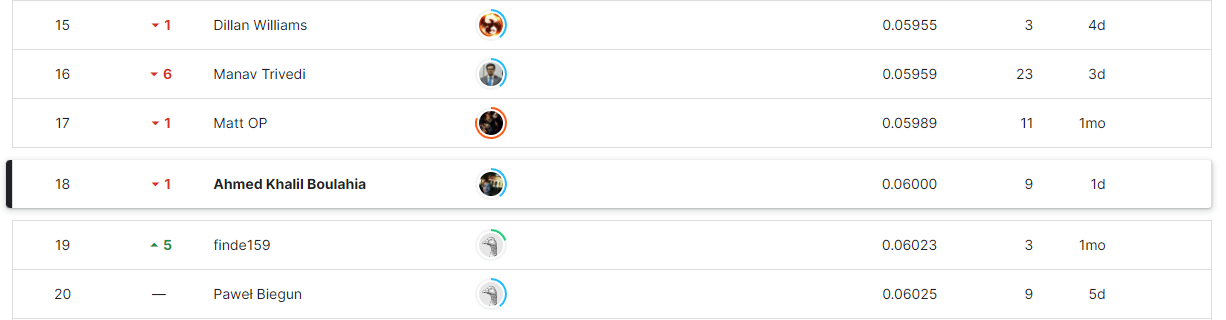

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")
df_sub = pd.read_csv("/content/sample_submission.csv")

## Data Pre-Processing

In [ ]:
print( "Train shape:" ,df_train.shape, ",   Test shape:", df_test.shape)

Train shape: (13000, 28) ,   Test shape: (7000, 27)


In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
df_train.head(5)

,id,categoryA,categoryB,categoryC,categoryD,categoryE,categoryF,featureA,featureB,featureC,featureD,featureE,featureF,featureG,featureH,featureI,compositionA,compositionB,compositionC,compositionD,compositionE,compositionF,compositionG,compositionH,compositionI,compositionJ,unit,result
0,a563699ca2a601c6ac64aa29986a00a90fb42b48741695...,catA_1,catB_0,catC_718,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.000000,71176346.0,0.0,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000458
1,91ab3eb3bcf6c8c1c5fe2da9ba671aa5a48c7369d9a50f...,catA_1,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.000000,71176346.0,0.0,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_6,0.000335
2,7128c51c554735d6c81862684ad6005ae12d2edbcd4644...,catA_15,catB_0,catC_1309,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,30.831906,0.0,2.806036e+12,0.000000,71176346.0,0.0,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_4,0.054072
3,c8144b52e4f63014de0a0d8e1c629bf0b05cb2696cfc23...,catA_0,catB_0,catC_935,catD_0,catE_0,catF_0,75808.375,4.457840,0.005718,122.299437,30.831906,2.0,2.806036e+12,0.000000,71176346.0,0.0,10.0,26.0,0.0,32.0,3.0,0.0,9.0,22.26,20.0,unit_5,0.061143
4,88d15a5b2df6692f23d105ff1ae82ae026be00c9271eef...,catA_22,catB_0,catC_1325,catD_0,catE_2,catF_0,-40055.250,4.363288,0.729194,93.677197,15.047884,4.0,1.464509e+12,87.158924,50941692.0,0.0,8.0,14.0,0.0,49.0,3.0,2.0,9.0,16.84,15.0,unit_15,0.015439


In [ ]:
train= df_train
test= df_test

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13000 non-null  object 
 1   categoryA     13000 non-null  object 
 2   categoryB     13000 non-null  object 
 3   categoryC     13000 non-null  object 
 4   categoryD     13000 non-null  object 
 5   categoryE     13000 non-null  object 
 6   categoryF     13000 non-null  object 
 7   featureA      12936 non-null  float64
 8   featureB      12936 non-null  float64
 9   featureC      12936 non-null  float64
 10  featureD      12936 non-null  float64
 11  featureE      12936 non-null  float64
 12  featureF      13000 non-null  float64
 13  featureG      12936 non-null  float64
 14  featureH      12936 non-null  float64
 15  featureI      12936 non-null  float64
 16  compositionA  12936 non-null  float64
 17  compositionB  12936 non-null  float64
 18  compositionC  12936 non-nu

In [ ]:
#Combine train and test data to process them together
target = train.result
train.drop(["result"],axis = 1 , inplace = True)

combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop(['index', 'id'], inplace=True, axis=1)

In [ ]:
combined.columns

Index(['categoryA', 'categoryB', 'categoryC', 'categoryD', 'categoryE',
       'categoryF', 'featureA', 'featureB', 'featureC', 'featureD', 'featureE',
       'featureF', 'featureG', 'featureH', 'featureI', 'compositionA',
       'compositionB', 'compositionC', 'compositionD', 'compositionE',
       'compositionF', 'compositionG', 'compositionH', 'compositionI',
       'compositionJ', 'unit'],
      dtype='object')

In [ ]:
# splitting categorical and numerical features
numerical_cols = combined.select_dtypes(include=np.number).columns.to_list()
categoric_cols = combined.select_dtypes(include='object').columns.to_list()

print(f'''# of numerical cols: {len(numerical_cols)}
# of categoric cols: {len(categoric_cols)}''')

# of numerical cols: 19
# of categoric cols: 7


In [ ]:
# calculating the mean and the mode
numerical_imputations = combined[numerical_cols].mean(numeric_only=True)
categoric_imputations = combined[categoric_cols].mode()

In [ ]:
# filling the nan with mean if numerical and mode if categorical
combined[numerical_cols] = combined[numerical_cols].fillna(numerical_imputations)
combined[categoric_cols] = combined[categoric_cols].fillna(categoric_imputations)

In [ ]:
combined.isna().sum()

categoryA       0
categoryB       0
categoryC       0
categoryD       0
categoryE       0
categoryF       0
featureA        0
featureB        0
featureC        0
featureD        0
featureE        0
featureF        0
featureG        0
featureH        0
featureI        0
compositionA    0
compositionB    0
compositionC    0
compositionD    0
compositionE    0
compositionF    0
compositionG    0
compositionH    0
compositionI    0
compositionJ    0
unit            0
dtype: int64

In [ ]:
cat_to_int = lambda x : int(x.split("_")[-1])

def tranform_df(df,features):
    to_id = ["categoryA","categoryB","categoryC","categoryD"
             ,"categoryE","categoryF","unit"]
    for name in to_id:
        df[name] = df[name].apply(cat_to_int)
        
    #features engenering
    #added_f = []
    #for f1 in features:
        #for f2 in features:      
            #df[f1+"+"+f2] = df[f1]+df[f2]
            #df[f1+"-"+f2] = df[f1]-df[f2]
            #df[f1+"*"+f2] = df[f1]*df[f2]
            
    return df

In [ ]:
combined.columns

Index(['categoryA', 'categoryB', 'categoryC', 'categoryD', 'categoryE',
       'categoryF', 'featureA', 'featureB', 'featureC', 'featureD', 'featureE',
       'featureF', 'featureG', 'featureH', 'featureI', 'compositionA',
       'compositionB', 'compositionC', 'compositionD', 'compositionE',
       'compositionF', 'compositionG', 'compositionH', 'compositionI',
       'compositionJ', 'unit'],
      dtype='object')

In [ ]:
features = [x for x in combined if x !="id"]
combined = tranform_df(combined,features)

In [ ]:
def split_combined():
    global combined
    train = combined[:13000]
    test = combined[13000:]

    return train , test 
  
train, test = split_combined()

## NN Model

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               3456      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 168,321
Trainable params: 168,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train.isnull().any()

categoryA       False
categoryB       False
categoryC       False
categoryD       False
categoryE       False
categoryF       False
featureA        False
featureB        False
featureC        False
featureD        False
featureE        False
featureF        False
featureG        False
featureH        False
featureI        False
compositionA    False
compositionB    False
compositionC    False
compositionD    False
compositionE    False
compositionF    False
compositionG    False
compositionH    False
compositionI    False
compositionJ    False
unit            False
dtype: bool

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(train, target, epochs=150, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/150
324/325 [============================>.] - ETA: 0s - loss: 639351296.0000 - mean_absolute_error: 639351296.0000
Epoch 1: val_loss improved from inf to 61304200.00000, saving model to Weights-001--61304200.00000.hdf5
325/325 [==============================] - 3s 4ms/step - loss: 637471808.0000 - mean_absolute_error: 637471808.0000 - val_loss: 61304200.0000 - val_mean_absolute_error: 61304200.0000
Epoch 2/150
321/325 [============================>.] - ETA: 0s - loss: 39011468.0000 - mean_absolute_error: 39011468.0000
Epoch 2: val_loss improved from 61304200.00000 to 58441424.00000, saving model to Weights-002--58441424.00000.hdf5
325/325 [==============================] - 1s 4ms/step - loss: 39443820.0000 - mean_absolute_error: 39443820.0000 - val_loss: 58441424.0000 - val_mean_absolute_error: 58441424.0000
Epoch 3/150
311/325 [===========================>..] - ETA: 0s - loss: 14510403.0000 - mean_absolute_error: 14510403.0000
Epoch 3: val_loss improved from 58441424.00000 to

In [ ]:
# Load wights file of the best model :
wights_file = "/content/Weights-053--0.13657.hdf5" # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'id':df_test.id,'result':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

predictions = NN_model.predict(test)
#make_submission(predictions[:,0],'submission(NN)')

219/219 [==============================] - 1s 2ms/step
A submission file has been made


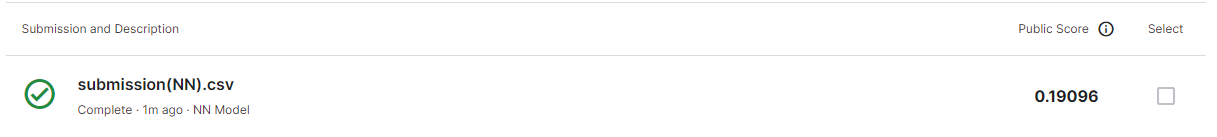

## XGBoost

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(train, target, test_size = 0.25, random_state = 14)

In [ ]:
XGBModel = XGBRegressor(learning_rate=0.1, n_estimators=140, max_depth=10,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4,seed=127)

XGBModel.fit(train_X,train_y , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(val_X)
MAE = mean_absolute_error(val_y , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

XGBoost validation MAE =  0.04404212011390522


In [ ]:
XGBpredictions = XGBModel.predict(test)
make_submission(XGBpredictions,'Submission(XGB)')

A submission file has been made


In [ ]:
XGBpredictions

array([0.4267431 , 0.7665023 , 0.52288723, ..., 0.05935479, 0.07325049,
       0.03669842], dtype=float32)

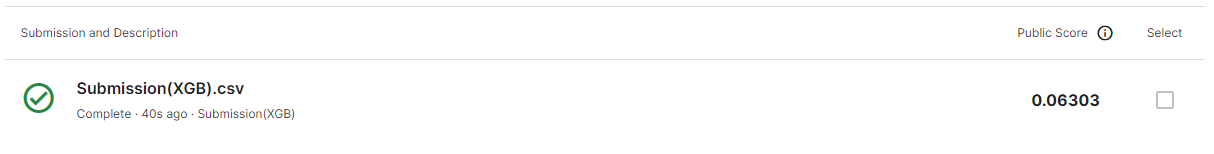

## RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  0.04408623949870749


In [ ]:
predicted_prices = model.predict(test)
#make_submission(predicted_prices,'Submission(RF).csv')

A submission file has been made


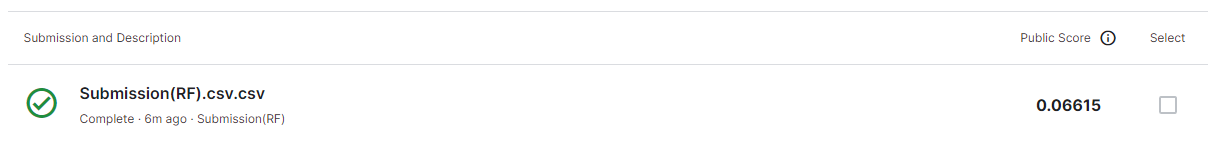

I found that the XGBoost Regressor and the Random Forest Regressor performed the best in terms of prediction accuracy. Both models outperformed the Sequential Neural Network in this task, which is a reasonable outcome given the nature of the data.

The XGBoost Regressor and the Random Forest Regressor are both tree-based models that excel in handling tabular data with multiple levels of categorical data. These models can capture complex interactions between variables, making them particularly well-suited for this type of problem.

Ultimately, the XGBoost Regressor had the best performance based on the RMSE metric, followed closely by the Random Forest Regressor. I believe that the combination of these two models can provide a robust solution for similar regression problems in the future.